In [1]:
# Library Import
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# import the train test split
from sklearn.model_selection import train_test_split

# List to store results



# Get current working directory
cwd = os.getcwd()
path = cwd + "/Model_inputs/"
# Uses the input file generated from preprocessing
input_file = path + 'input_WA.csv'
input_price= path + "input_price.csv"

input_data_temp = pd.read_csv(input_file)
input_data_temp = input_data_temp.iloc[:, 3:]
price_y = pd.read_csv(input_price)


input_data, X_test, price, y_test = train_test_split(input_data_temp, price_y, test_size=0.0)



# Making all column names UPPER CASE --> inline with the weather data file
input_data.columns = map(str.upper, input_data.columns)

# List of column names
col_names = list(input_data)

#ps
#Risk-free rate for 1986 - 2016 : 9.34% ( 30-year Treasury Constant Maturity Rate at 1986 )
# Monthly discount rate = 1/1.000248 

# Splitting Data into Training and Test



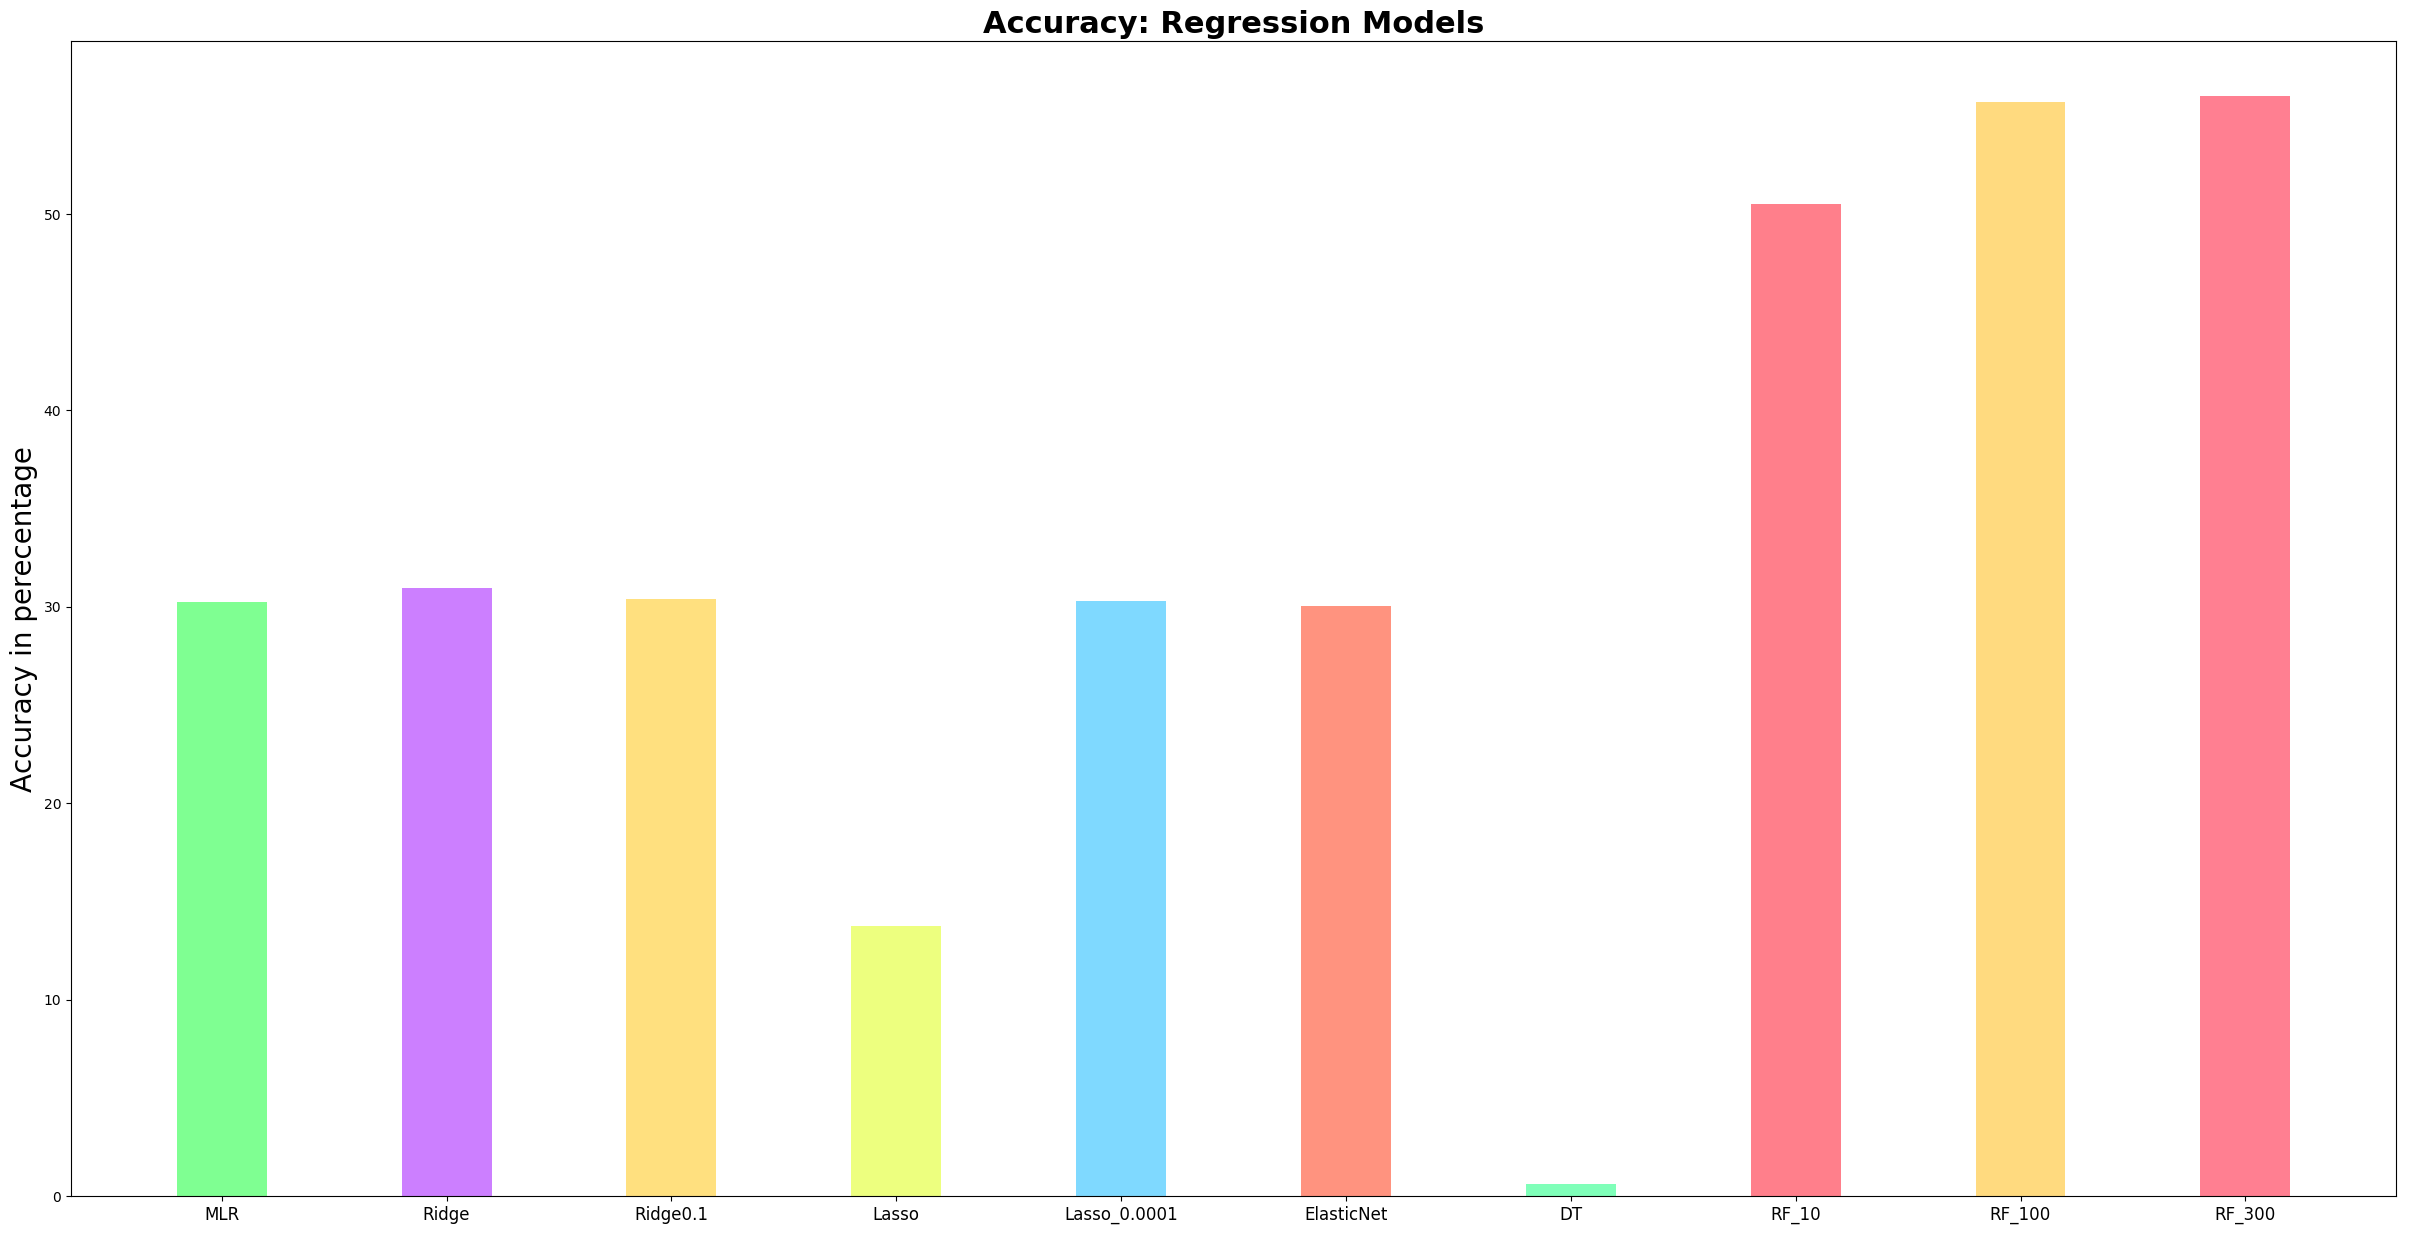

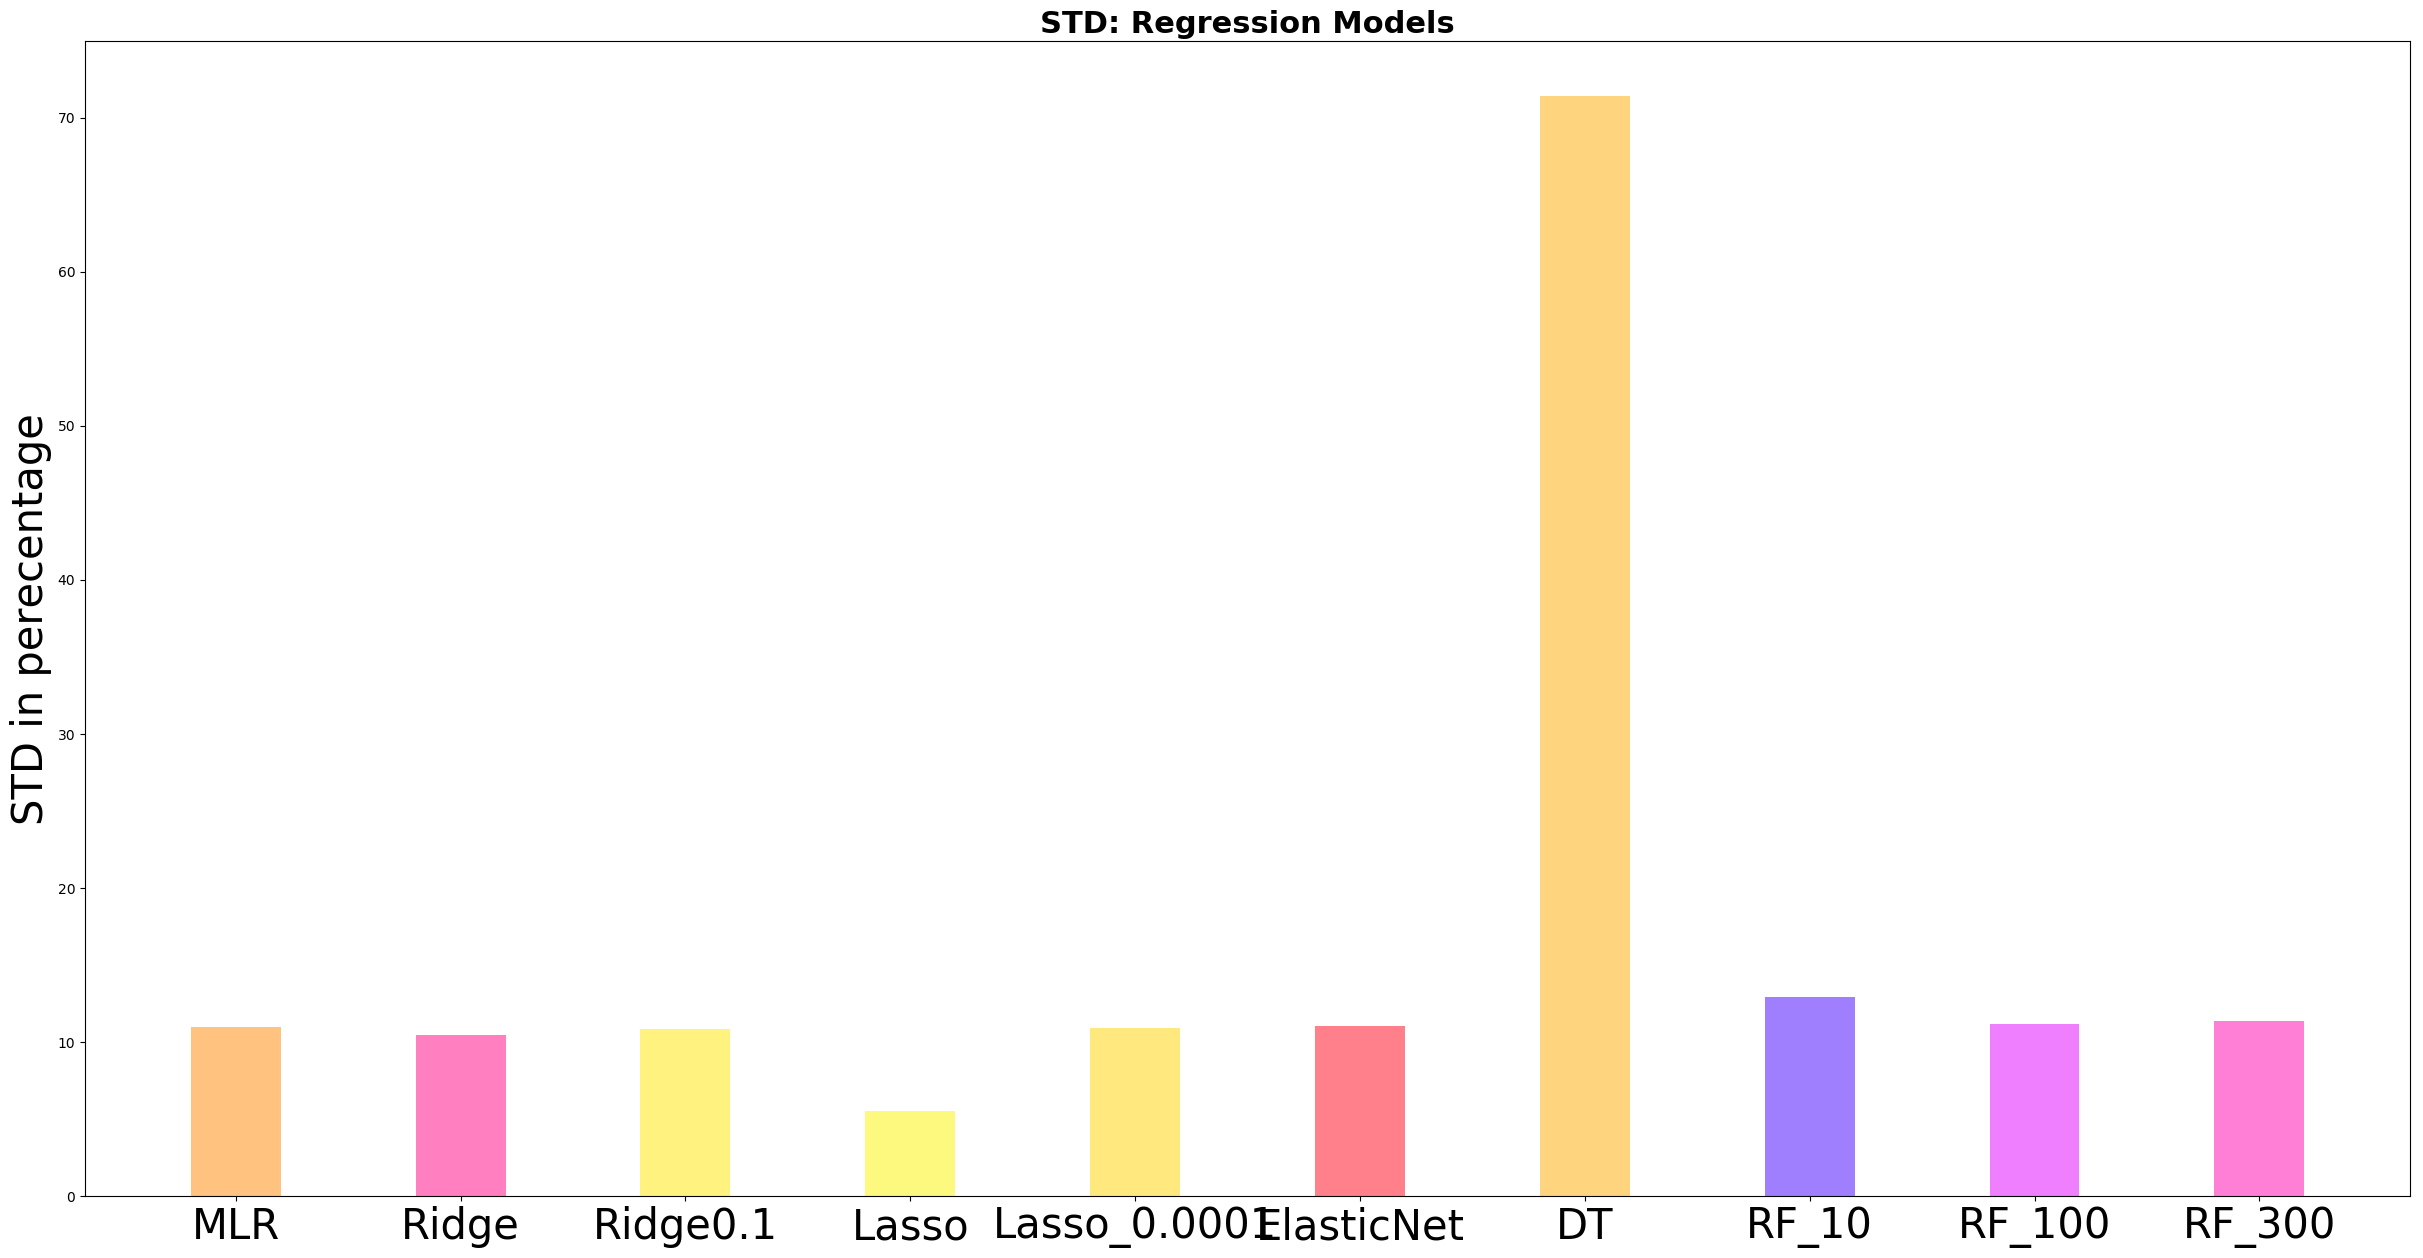

In [3]:


# Models 

from sklearn.model_selection import cross_val_score
# Stores the performance on test set.
model_results = []
#  Stores the name of model
model_name = []
model_std = []

# Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("MLR")

#Ridge Regression
from sklearn.linear_model import Ridge
regressor = Ridge()
accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("Ridge")

from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 0.1)
accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("Ridge0.1")

#Lasso
from sklearn.linear_model import Lasso
regressor = Lasso()
accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("Lasso")

from sklearn.linear_model import Lasso
regressor = Lasso(alpha=0.0001, max_iter=100000)
accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("Lasso_0.0001")

#ElasticNet
from sklearn.linear_model import ElasticNet
regressor = ElasticNet(alpha=0.1, l1_ratio=0.7,max_iter = 100000)
accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("ElasticNet")

#Decision Tree
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("DT")

#Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("RF_10")

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("RF_100")

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
accuracies = cross_val_score(estimator = regressor, X = input_data, y = price["Value"], cv = 10)
model_results.append(accuracies.mean())
model_std.append(accuracies.std())
model_name.append("RF_300")




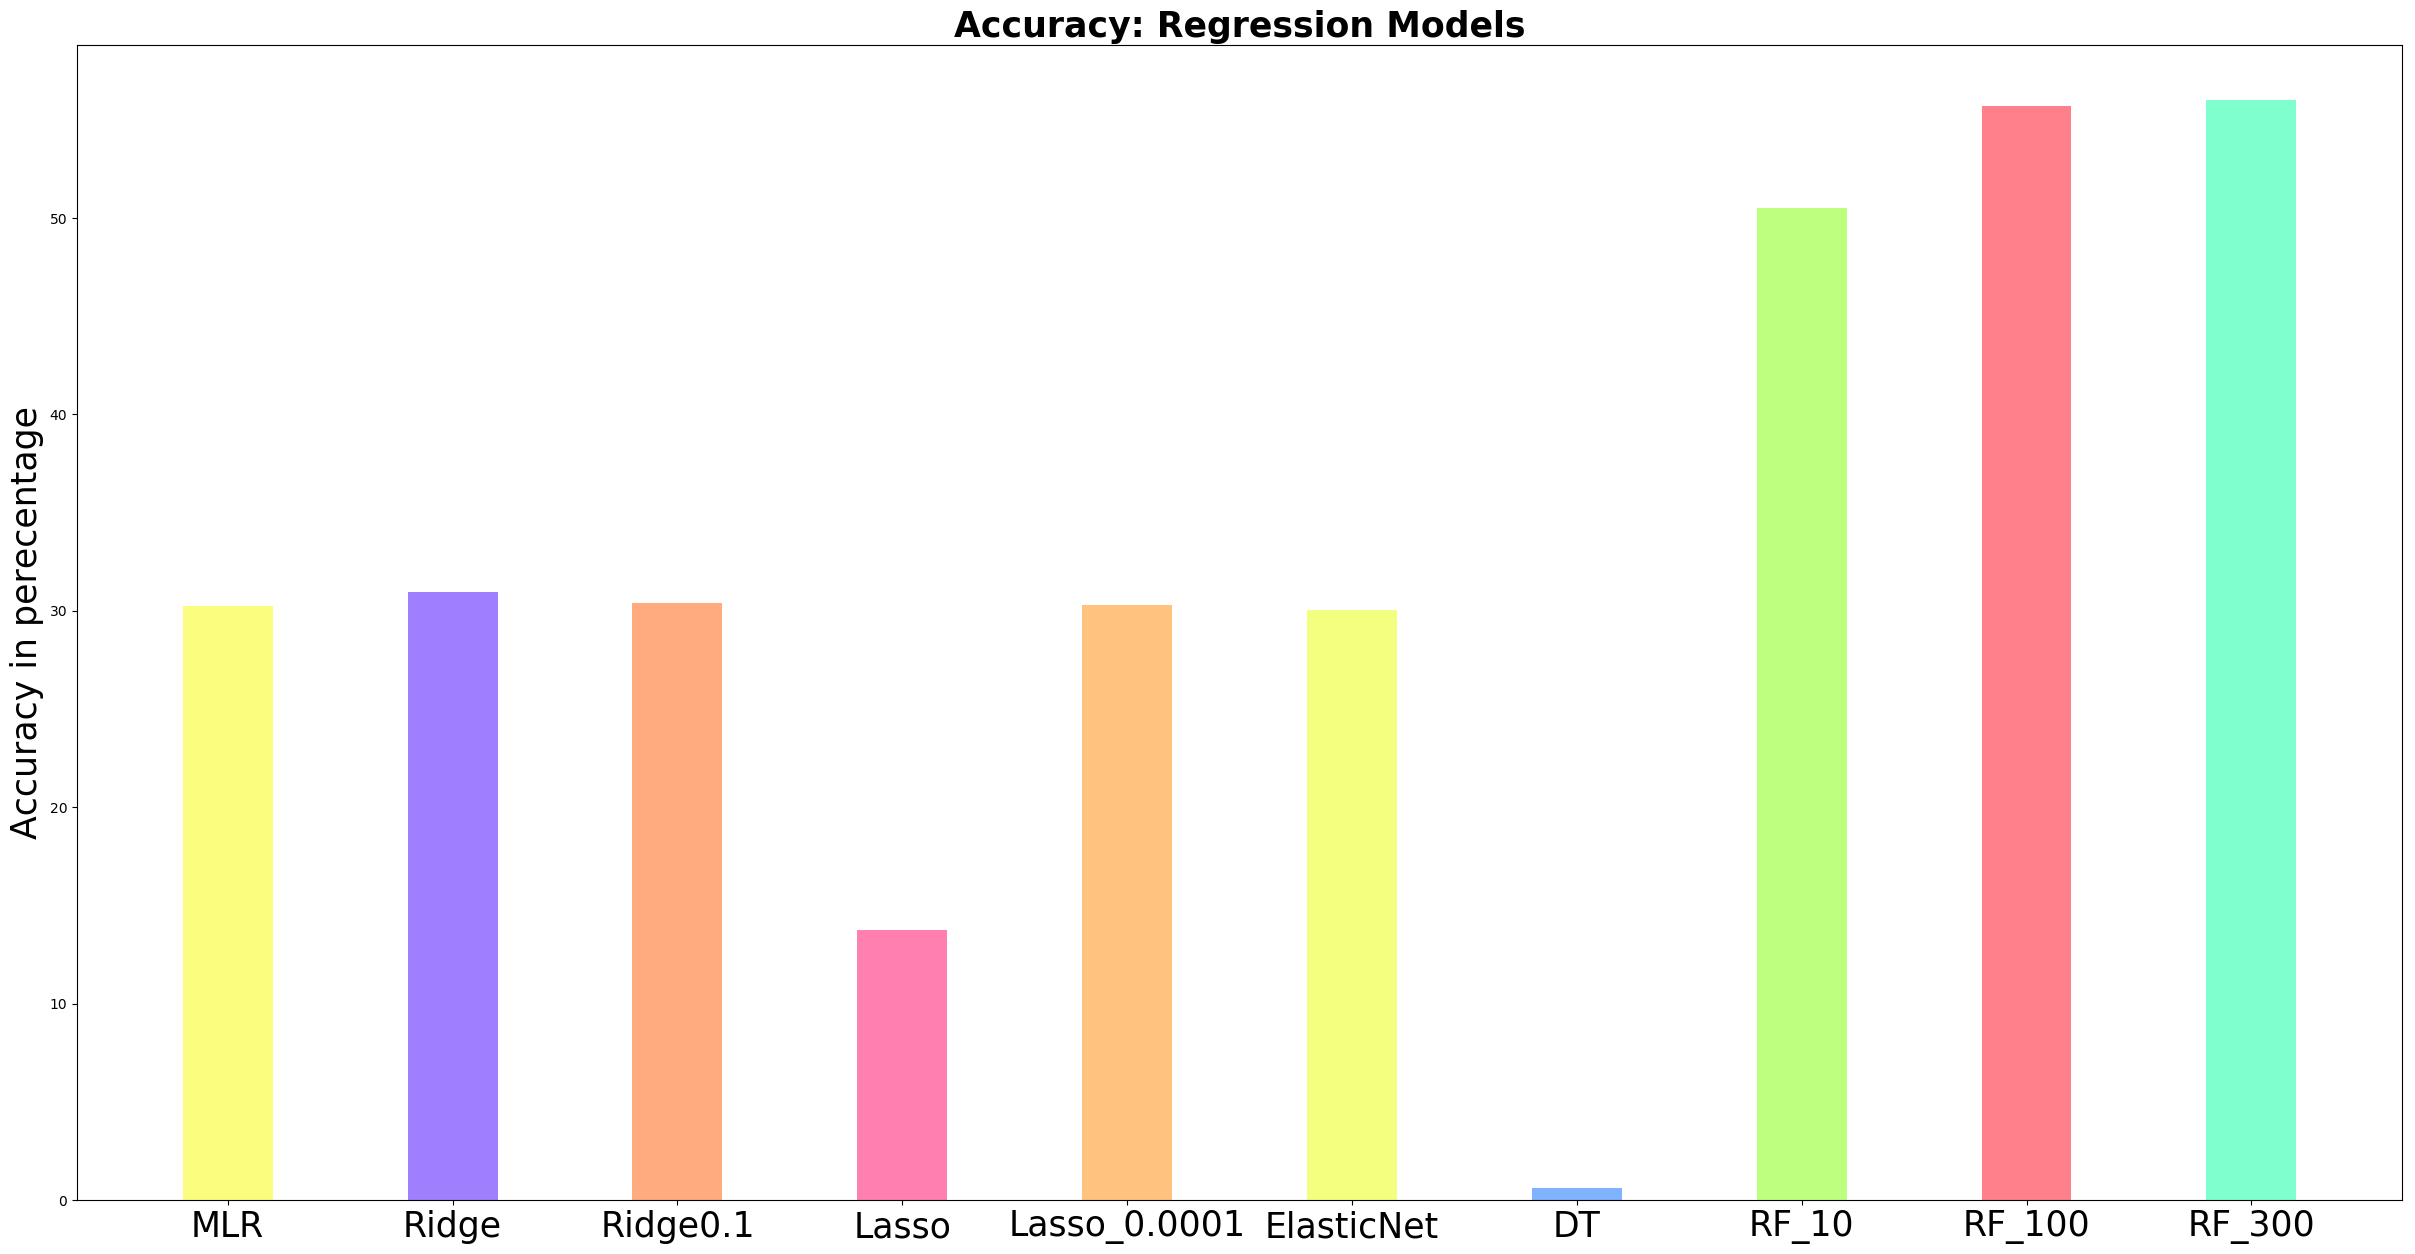

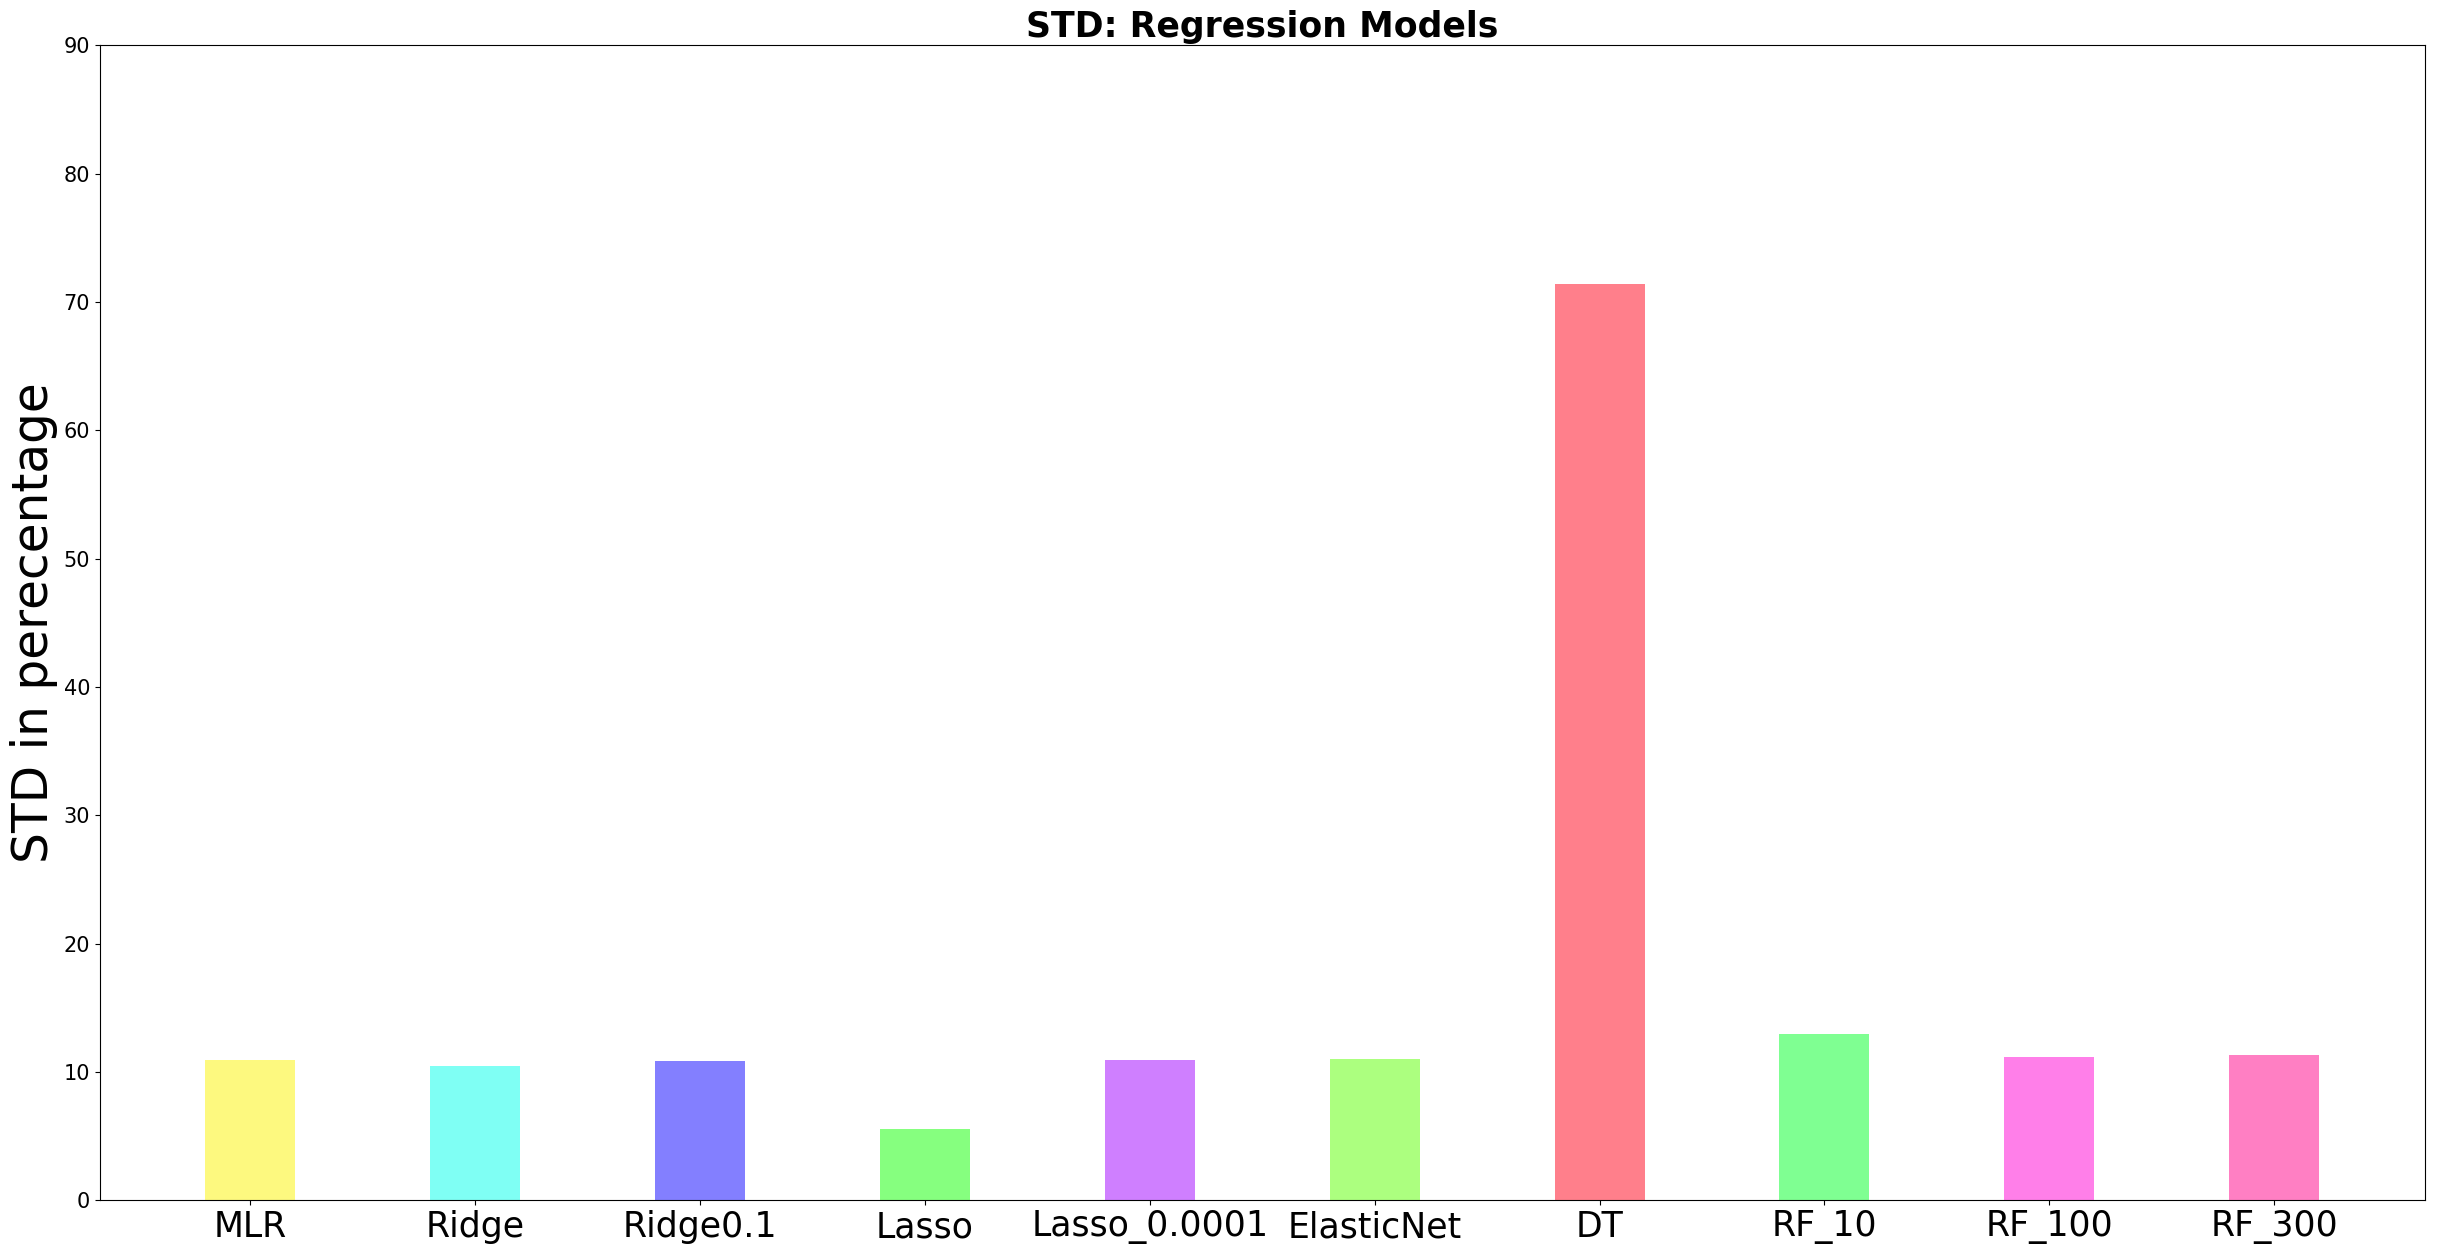

In [13]:


#Plotting
from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_results_percentage = list(map(lambda x: x*100, model_results))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (30,15))
plt.bar(y_pos, model_results_percentage, align='center', alpha=0.5, width=0.4, color = colors)
plt.xticks(y_pos, model_name, fontsize = 25)
plt.ylabel('Accuracy in perecentage', fontsize=25)
plt.title('Accuracy: Regression Models', fontsize=25, fontweight='bold')
plt.show()


from matplotlib import cm
import random

# Give each bar separate color
color_code_vector = random.sample(range(1, 100), len(model_name))
reg_color_code_vector = map(lambda x: x/max(color_code_vector), color_code_vector)
reg_color_code_vector = list(reg_color_code_vector)
reg_color_code_vector
colors = cm.hsv(reg_color_code_vector)

# Expressing accuracy in percentage
model_std_percentage = list(map(lambda x: x*100, model_std))

y_pos = np.arange(len(model_name))

plt.rcdefaults() # white background, gets rid of gray
plt.figure(figsize = (30,15))
plt.bar(y_pos, model_std_percentage, align='center', alpha=0.5, width=0.4, color = colors)
plt.xticks(y_pos, model_name, fontsize = 25)
plt.ylabel('STD in perecentage', fontsize=35)
plt.yticks(range(0,100,10), fontsize = 20)
plt.title('STD: Regression Models', fontsize=25, fontweight='bold')
plt.show()

In [7]:
model_std

[0.10963116984537222,
 0.10474100420826363,
 0.1085070542629112,
 0.055503213726448307,
 0.10923224816131652,
 0.11039226084540532,
 0.71378471757303696,
 0.12929689887085968,
 0.11156831142512645,
 0.11357799023667021]